In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pyfolio as pf

In [15]:
Cluster_Sectoriales = pd.read_csv('Cluster Rent Sectoriales Base 100.csv')
Cluster_Sectoriales.set_index('Date', inplace = True)
Cluster_Sectoriales.index = pd.to_datetime(Cluster_Sectoriales.index)

Cluster_Individuales = pd.read_csv('Cluster Rent Individuales Base 100.csv')
Cluster_Individuales.set_index('Date', inplace = True)
Cluster_Individuales.index = pd.to_datetime(Cluster_Individuales.index)

Cluster_Conjunto = pd.read_csv('Cluster Rent Conjuntos Base 100.csv')
Cluster_Conjunto.set_index('Date', inplace = True)
Cluster_Conjunto.index = pd.to_datetime(Cluster_Conjunto.index)


Est_Sectoriales = pd.read_csv('Rentabilidad de estrategias Sectoriales base 100.csv')
Est_Sectoriales.set_index('Date', inplace = True)
Est_Sectoriales.index = pd.to_datetime(Est_Sectoriales.index)

Est_Individuales = pd.read_csv('Rentabilidad de estrategias Individuales base 100.csv')
Est_Individuales.set_index('Date', inplace = True)
Est_Individuales.index = pd.to_datetime(Est_Individuales.index)

Est_Conjunto = pd.read_csv('Rentabilidad de estrategias Todas base 100.csv')
Est_Conjunto.set_index('Date', inplace = True)
Est_Conjunto.index = pd.to_datetime(Est_Conjunto.index)

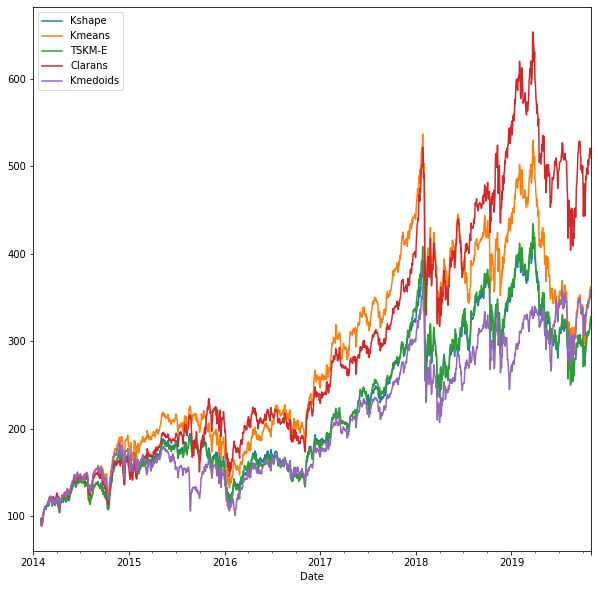

In [128]:
ja = 100*(Cluster_Sectoriales + 1).cumprod()
ja.plot(figsize = (10,10))

In [46]:
Bench_Sectoriales = Est_Sectoriales.sum(axis = 1)/Est_Sectoriales.shape[1]
Bench_Individuales = Est_Individuales.sum(axis = 1)/Est_Individuales.shape[1]
Bench_Conjunto = Est_Conjunto.sum(axis = 1)/Est_Conjunto.shape[1]

In [116]:
pf.timeseries.perf_stats(Bench_Sectoriales)

Annual return           0.269725
Cumulative returns     14.175297
Annual volatility       0.600768
Sharpe ratio            0.701845
Calmar ratio            0.325083
Stability               0.951618
Max drawdown           -0.829710
Omega ratio             1.146279
Sortino ratio           0.990358
Skew                   -0.266678
Kurtosis                8.017594
Tail ratio              0.910632
Daily value at risk    -0.074016
dtype: float64

In [119]:
pf.timeseries.perf_stats(Bench_Individuales)

Annual return          -0.008497
Cumulative returns     -0.092610
Annual volatility       1.440686
Sharpe ratio            0.770572
Calmar ratio           -0.008506
Stability               0.849193
Max drawdown           -0.998950
Omega ratio             1.161103
Sortino ratio           1.094271
Skew                   -0.183021
Kurtosis               10.142831
Tail ratio              0.976076
Daily value at risk    -0.177104
dtype: float64

In [120]:
pf.timeseries.perf_stats(Bench_Conjunto)

Annual return           0.294016
Cumulative returns     17.946626
Annual volatility       0.904780
Sharpe ratio            0.749815
Calmar ratio            0.306792
Stability               0.943806
Max drawdown           -0.958354
Omega ratio             1.157726
Sortino ratio           1.060720
Skew                   -0.254941
Kurtosis                8.946032
Tail ratio              0.951776
Daily value at risk    -0.111299
dtype: float64

In [27]:
Resul_Clu_Sect = pd.DataFrame()
Resul_Clu_Indi = pd.DataFrame()
Resul_Clu_Conj = pd.DataFrame()

for clu in Cluster_Sectoriales.columns:
    Resul_Clu_Sect[clu] = np.round(pf.timeseries.perf_stats(Cluster_Sectoriales[clu]).dropna(),2)
    Resul_Clu_Indi[clu] = np.round(pf.timeseries.perf_stats(Cluster_Individuales[clu]).dropna(),2)
    Resul_Clu_Conj[clu] = np.round(pf.timeseries.perf_stats(Cluster_Conjunto[clu]).dropna(),2)

In [39]:
Resul_Clu_Sect

,Kshape,Kmeans,TSKM-E,Clarans,Kmedoids
Annual return,0.21,0.23,0.21,0.31,0.23
Cumulative returns,2.22,2.53,2.22,4.10,2.54
Annual volatility,0.42,0.42,0.42,0.42,0.43
Sharpe ratio,0.68,0.72,0.68,0.86,0.71
Calmar ratio,0.51,0.49,0.50,0.79,0.51
Stability,0.83,0.83,0.83,0.94,0.83
Max drawdown,-0.42,-0.48,-0.42,-0.39,-0.45
Omega ratio,1.13,1.14,1.13,1.17,1.14
Sortino ratio,0.95,0.99,0.94,1.21,0.98
Tail ratio,1.01,1.01,1.01,1.02,1.02


In [29]:
Resul_Clu_Indi

,Kshape,Kmeans,TSKM-E,Clarans,Kmedoids
Annual return,0.36,0.11,0.44,0.49,0.30
Cumulative returns,5.35,0.89,8.22,10.03,3.98
Annual volatility,1.18,1.18,1.19,1.20,1.18
Sharpe ratio,0.87,0.70,0.93,0.96,0.84
Calmar ratio,0.38,0.11,0.46,0.52,0.32
Stability,0.62,0.35,0.63,0.64,0.58
Max drawdown,-0.95,-0.97,-0.96,-0.94,-0.95
Omega ratio,1.17,1.13,1.18,1.18,1.16
Sortino ratio,1.23,0.97,1.30,1.35,1.18
Tail ratio,0.99,0.95,0.95,1.00,0.97


In [30]:
Resul_Clu_Conj

,Kshape,Kmeans,TSKM-E,Clarans,Kmedoids
Annual return,0.25,0.07,0.21,0.21,0.27
Cumulative returns,2.80,0.50,2.17,2.13,3.35
Annual volatility,0.79,0.93,0.82,0.99,0.82
Sharpe ratio,0.69,0.56,0.66,0.70,0.72
Calmar ratio,0.30,0.08,0.25,0.23,0.32
Stability,0.52,0.35,0.59,0.43,0.61
Max drawdown,-0.81,-0.89,-0.85,-0.90,-0.87
Omega ratio,1.15,1.11,1.14,1.14,1.15
Sortino ratio,0.96,0.76,0.92,0.99,1.01
Tail ratio,0.99,1.00,0.99,1.02,1.02


In [32]:
Resul_Est_Sect = pd.DataFrame()
Resul_Est_Indi = pd.DataFrame()
Resul_Est_Conj = pd.DataFrame()

for clu in Est_Sectoriales.columns:
    Resul_Est_Sect[clu] = np.round(pf.timeseries.perf_stats(Est_Sectoriales[clu]).dropna(),2)

for clu in Est_Individuales.columns:
    Resul_Est_Indi[clu] = np.round(pf.timeseries.perf_stats(Est_Individuales[clu]).dropna(),2)

for clu in Est_Conjunto.columns:
    Resul_Est_Conj[clu] = np.round(pf.timeseries.perf_stats(Est_Conjunto[clu]).dropna(),2)

In [35]:
Resul_Est_Sect

,LA1,LA101,LSA101,LA2,LA3,LA44,LA53,LA54,LA6,LAMAR
Annual return,0.35,0.33,0.13,0.18,0.21,0.22,0.19,0.20,0.15,0.31
Cumulative returns,28.68,23.69,2.86,5.57,8.02,8.73,6.09,6.90,3.85,20.79
Annual volatility,0.68,0.72,0.38,0.67,0.71,0.70,0.67,0.67,0.70,0.62
Sharpe ratio,0.78,0.76,0.50,0.59,0.63,0.64,0.59,0.61,0.55,0.75
Calmar ratio,0.39,0.35,0.19,0.22,0.24,0.26,0.23,0.26,0.17,0.42
Stability,0.95,0.95,0.65,0.91,0.91,0.93,0.92,0.91,0.85,0.95
Max drawdown,-0.89,-0.93,-0.65,-0.83,-0.88,-0.85,-0.83,-0.78,-0.87,-0.74
Omega ratio,1.17,1.16,1.10,1.12,1.13,1.13,1.12,1.12,1.11,1.15
Sortino ratio,1.12,1.07,0.73,0.82,0.90,0.90,0.85,0.87,0.78,1.05
Skew,-0.14,-0.25,0.33,-0.36,-0.27,-0.32,-0.07,-0.09,-0.22,-0.32


In [34]:
Resul_Est_Indi

,LA1,LA2,LA3,LA44,LA6,LAMAR
Annual return,0.15,-0.41,-0.34,-0.09,-0.28,-0.13
Cumulative returns,4.09,-1.00,-0.99,-0.67,-0.98,-0.79
Annual volatility,1.60,1.55,1.54,1.54,1.54,1.53
Sharpe ratio,0.98,0.63,0.57,0.79,0.61,0.71
Calmar ratio,0.15,-0.41,-0.34,-0.09,-0.28,-0.13
Stability,0.84,0.48,0.32,0.84,0.51,0.61
Max drawdown,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
Omega ratio,1.21,1.13,1.12,1.16,1.12,1.14
Sortino ratio,1.39,0.89,0.82,1.14,0.87,1.00
Skew,-0.36,-0.26,0.05,-0.04,0.15,-0.21


In [43]:
Resul_Est_Conj

,Sec_LA1,Sec_LA101,Sec_LSA101,Sec_LA2,Sec_LA3,Sec_LA44,Sec_LA53,Sec_LA54,Sec_LA6,Sec_LAMAR,Indi_LA1,Indi_LA2,Indi_LA3,Indi_LA44,Indi_LA6,Indi_LAMAR
Annual return,0.35,0.32,0.13,0.18,0.21,0.22,0.19,0.20,0.15,0.31,0.15,-0.41,-0.34,-0.09,-0.28,-0.13
Cumulative returns,28.68,23.69,2.86,5.57,8.02,8.73,6.09,6.90,3.85,20.79,4.09,-1.00,-0.99,-0.67,-0.98,-0.79
Annual volatility,0.68,0.72,0.38,0.67,0.71,0.70,0.67,0.67,0.70,0.62,1.60,1.55,1.54,1.54,1.54,1.53
Sharpe ratio,0.78,0.76,0.50,0.59,0.63,0.64,0.59,0.61,0.55,0.75,0.98,0.63,0.57,0.79,0.61,0.71
Calmar ratio,0.39,0.35,0.19,0.21,0.24,0.26,0.23,0.25,0.17,0.42,0.15,-0.41,-0.34,-0.09,-0.28,-0.13
Stability,0.95,0.95,0.65,0.91,0.91,0.93,0.92,0.91,0.85,0.95,0.84,0.48,0.32,0.84,0.51,0.61
Max drawdown,-0.89,-0.93,-0.65,-0.83,-0.88,-0.85,-0.83,-0.78,-0.87,-0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
Omega ratio,1.17,1.16,1.10,1.12,1.13,1.13,1.12,1.12,1.11,1.15,1.21,1.13,1.12,1.16,1.12,1.14
Sortino ratio,1.12,1.07,0.73,0.82,0.90,0.90,0.85,0.87,0.78,1.05,1.39,0.89,0.82,1.14,0.87,1.00
Tail ratio,0.97,0.95,1.10,0.94,0.93,0.93,0.95,0.93,0.91,0.93,0.99,0.96,0.96,1.01,0.97,0.99


In [114]:
Sectorial = Cluster_Sectoriales['Clarans'][Cluster_Sectoriales.index >= pd.to_datetime('2014-01-31')]
Bench_Sectorial = Bench_Sectoriales[Bench_Sectoriales.index >= pd.to_datetime('2014-01-31')]

Sectorial = 100*(Sectorial + 1).cumprod()
Bench_Sectorial = 100*(Bench_Sectorial + 1).cumprod()

In [69]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [111]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Bench_Sectorial.index,
    y=list(Bench_Sectorial),
    name="Benchmark",
    marker=dict(color='gray')
))
fig.add_trace(go.Scatter(
    x=Sectorial.index,
    y=list(Sectorial),
    name="Cluster",
    marker=dict(color='green')
))
fig.update_layout(xaxis=dict(showgrid=False,showline=True),
                  yaxis=dict(showgrid=False,showline=True),
                    #title="Plot Title",
                    plot_bgcolor='#FCFCFC',
                    yaxis_title="Valoración",
                    #xaxis_title="",
                    font=dict(
                        family="Courier New, monospace",
                        size=18,
                        color="#7f7f7f"
                    ),
                  legend=go.layout.Legend(
        x=0.05,
        y=0.9,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2
    )
)
iplot(fig)

In [115]:
Individual = Cluster_Individuales['Clarans'][Cluster_Individuales.index >= pd.to_datetime('2014-01-31')]
Bench_Individual = Bench_Individuales[Bench_Individuales.index >= pd.to_datetime('2014-01-31')]

Individual = 100*(Individual + 1).cumprod()
Bench_Individual = 100*(Bench_Individual + 1).cumprod()

In [112]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Bench_Individual.index,
    y=list(Bench_Individual),
    name="Benchmark",
    marker=dict(color='gray')
))
fig.add_trace(go.Scatter(
    x=Individual.index,
    y=list(Individual),
    name="Cluster",
    marker=dict(color='green')
))
fig.update_layout(xaxis=dict(showgrid=False,showline=True),
                  yaxis=dict(showgrid=False,showline=True),
                    #title="Plot Title",
                    plot_bgcolor='#FCFCFC',
                    yaxis_title="Valoración",
                    #xaxis_title="",
                    font=dict(
                        family="Courier New, monospace",
                        size=18,
                        color="#7f7f7f"
                    ),
                  legend=go.layout.Legend(
        x=0.05,
        y=0.9,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2
    )
)
iplot(fig)

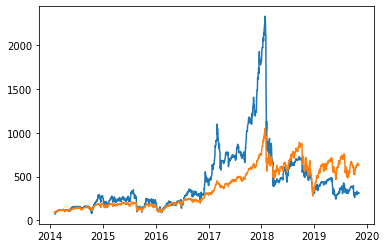

In [67]:
Conjunto = Cluster_Conjunto['Clarans'][Cluster_Conjunto.index >= pd.to_datetime('2014-01-31')]
Bench_Conjun = Bench_Conjunto[Bench_Conjunto.index >= pd.to_datetime('2014-01-31')]

Conjunto = 100*(Conjunto + 1).cumprod()
Bench_Conjun = 100*(Bench_Conjun + 1).cumprod()

In [113]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Bench_Conjun.index,
    y=list(Bench_Conjun),
    name="Benchmark",
    marker=dict(color='gray')
))
fig.add_trace(go.Scatter(
    x=Conjunto.index,
    y=list(Conjunto),
    name="Cluster",
    marker=dict(color='green')
))
fig.update_layout(xaxis=dict(showgrid=False,showline=True),
                  yaxis=dict(showgrid=False,showline=True),
                    #title="Plot Title",
                    plot_bgcolor='#FCFCFC',
                    yaxis_title="Valoración",
                    #xaxis_title="",
                    font=dict(
                        family="Courier New, monospace",
                        size=18,
                        color="#7f7f7f"
                    ),
                  legend=go.layout.Legend(
        x=0.05,
        y=0.9,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="white",
        bordercolor="Black",
        borderwidth=2
    )
)
iplot(fig)